#### Lifecycle of a Machine Learning Project
###### 1.Understand the Problem Statement 
###### 2.Data Acquisition
###### 3.Data Annotation
###### 4.Data Wrangling
###### 5.Model Development, Training and Evaluation
###### 6. Model Deployment and Maintenance

#### 1. Problem Statement 
###### How do factors like Gender, Ethnicity, Parental Education level, Type of Lunch, and Test Preparation affect Student Test Scores

#### 2. Data Acquisiton
###### Source of Data: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
###### The data is in CSV format and has 1000 rows and 8 columns

In [7]:
%pip install seaborn


  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
  Obtaining dependency information for matplotlib!=3.6.1,>=3.1 from https://files.pythonhosted.org/packages/ff/1f/2b83c7acf453318a80dc619e99fc30a663b2c1fb18be3d358a96addfecd9/matplotlib-3.7.2-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/94/0a/5eb57dd395fade977786b2d2c98c2bee8234358794be44422fe58a719d42/contourpy-1.1.0-cp310-cp310-win_amd64.whl.metadata
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/1c/c6/408ee90eae2fd7ef85c5baaedfc8d533805f4c54fc6670dbde9539f1277b/fonttools-4.42.1-cp310-cp310-win_amd64.whl.metadata
     ---------------------------------------- 0.0/154.1 kB ? eta -:--:--
     ---------------------------------------- 0.0/154.1 kB ? eta -:--:--
     ---------------------------------------- 0.0/154.1 kB ? eta -:--:--
   

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### 3. Data Annotation


In [2]:
## Import CSV file as pandas dataframe
student_df = pd.read_csv('data/stud.csv')

In [5]:
# Display the top 5 records
student_df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
# Shape of the dataset
student_df.shape

(1000, 8)

In [7]:
# Check data types
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


##### 4. Data Wrangling

In [10]:
# Check for missing values
student_df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [17]:
# Check for duplicate values
student_df.duplicated().sum()

0

In [18]:
# Check the number of unique values of each column
student_df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [22]:
# Check for statistics of dataset
student_df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:

print("Categories in 'gender' variable:   ",end=" ")
print(student_df['gender'].unique())

print("Categories in 'race/ethnicity' variable:   ",end=" ")
print(student_df['race_ethnicity'].unique())

print("Categories in 'parental level of education' variable:   ",end=" ")
print(student_df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:   ",end=" ")
print(student_df['lunch'].unique())

print("Categories in 'test preparation course' variable:   ",end=" ")
print(student_df['test_preparation_course'].unique())


Categories in 'gender' variable:    ['female' 'male']
Categories in 'race/ethnicity' variable:    ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:    ['standard' 'free/reduced']
Categories in 'test preparation course' variable:    ['none' 'completed']


In [25]:
#Define numerical and Categorical columns
numerical_features = [feature for feature in student_df.columns if student_df[feature].dtype != 'O']
categorical_features = [feature for feature in student_df.columns if student_df[feature].dtype == 'O']

#print columns
print('We have {} numerical features : {}'.format(len(numerical_features), numerical_features))
print('We have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [3]:
# Add columns for "Total Score" and "Average"
student_df['total_score'] = student_df['math_score'] + student_df['reading_score'] + student_df['writing_score']
student_df['average'] = student_df['total_score'] / 3 

student_df.tail(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333
999,female,group D,some college,free/reduced,none,77,86,86,249,83.000000


In [27]:
reading_full =  student_df[student_df['reading_score'] == 100]['average'].count()
writing_full =  student_df[student_df['writing_score'] ==  100]['average'].count()
math_full = student_df[student_df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading:{reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading:17


In [28]:
#Students with marks less than or equal to 20
reading_less_20 =  student_df[student_df['reading_score'] <= 20]['average'].count()
writing_less_20 =  student_df[student_df['writing_score'] <=  20]['average'].count()
math_less_20 = student_df[student_df['math_score'] <= 20]['average'].count()

print(f'Number of students with marks less than or equal to 20 in Maths: {math_less_20}')
print(f'Number of students with marks less than or equal to 20 in Writing: {writing_less_20}')
print(f'Number of students with marks less than or equal to 20 in Reading:{reading_less_20}')

Number of students with marks less than or equal to 20 in Maths: 4
Number of students with marks less than or equal to 20 in Writing: 3
Number of students with marks less than or equal to 20 in Reading:1


##### 4.1. Exploring Data (Visualization)

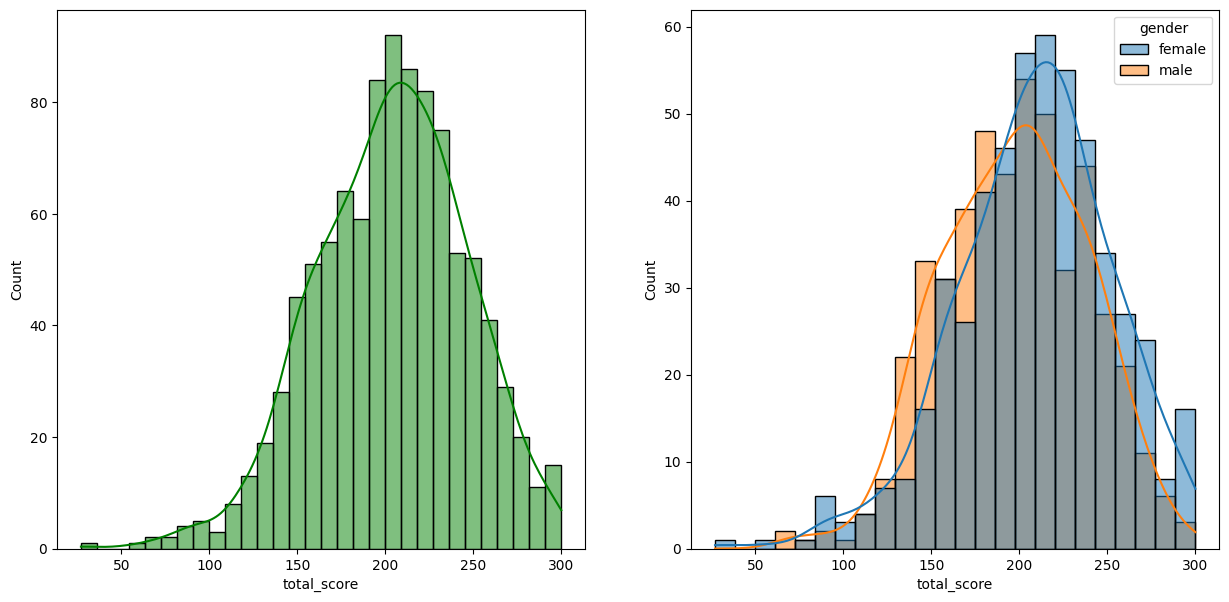

In [22]:
#visualize the average score and total score distribution to make conclusion
#Use Histogram and Kernel Density Estimation(KDE)

fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data= student_df, x= 'total_score', bins= 30, kde= True, color='g')
plt.subplot(122)
sns.histplot(data= student_df, x='total_score', kde= True, hue='gender')
plt.show()

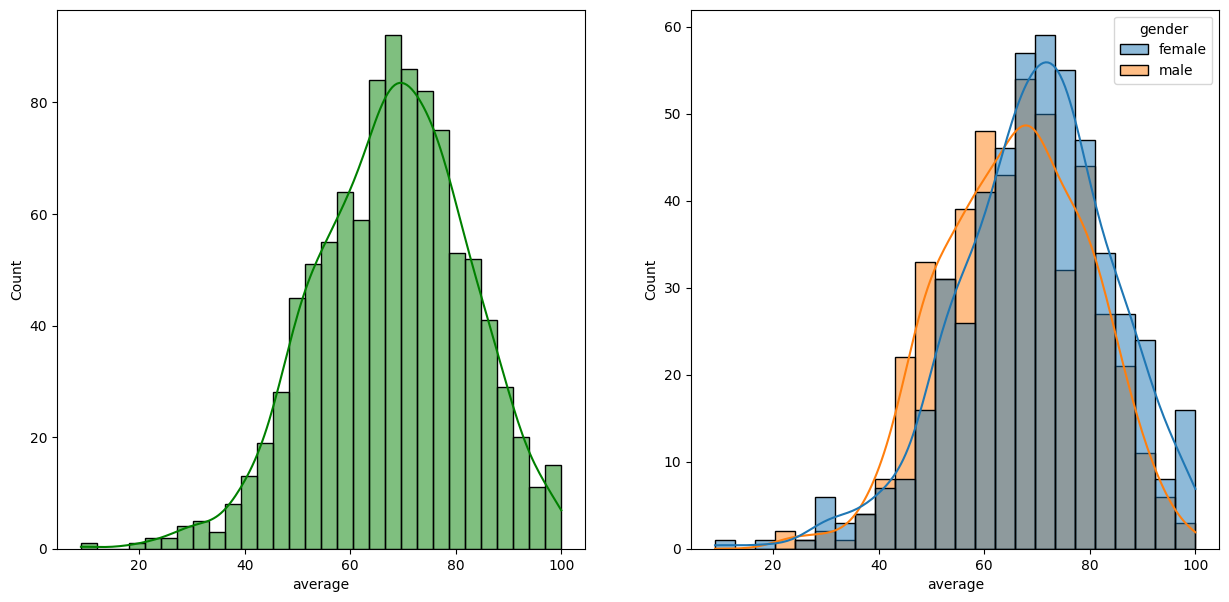

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data= student_df, x= 'average', bins= 30, kde= True, color='g')
plt.subplot(122)
sns.histplot(data= student_df, x='average', kde= True, hue='gender')
plt.show()

##### Insight
###### Female Students tend to perform better than male students

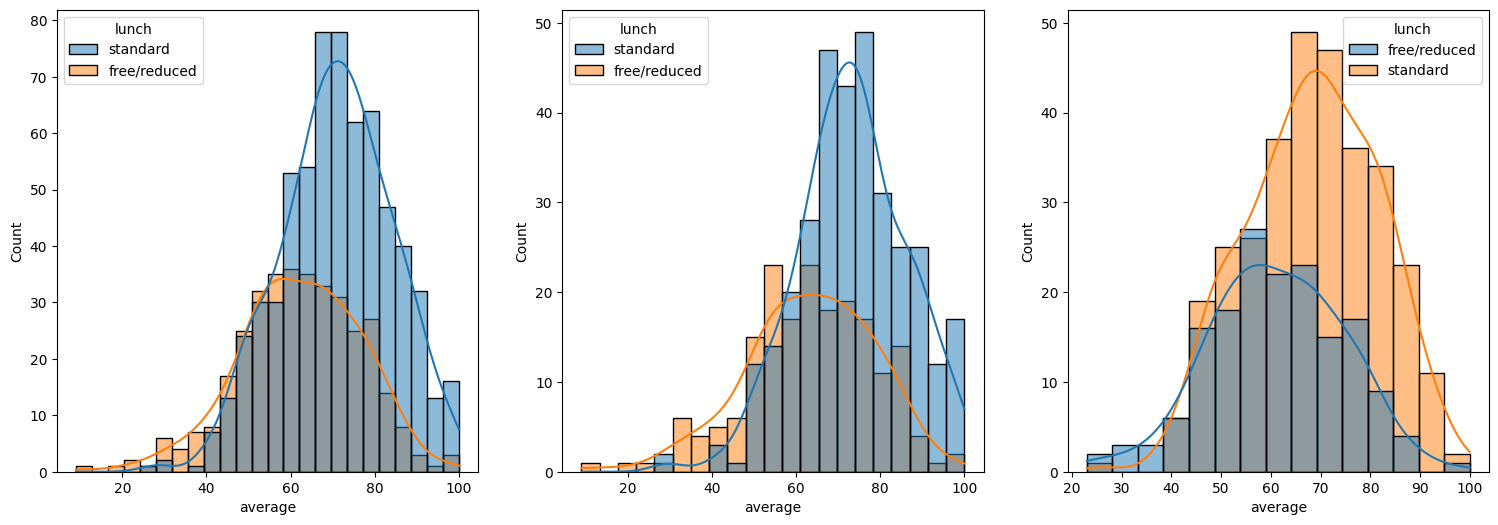

In [24]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
sns.histplot(data= student_df, x='average', kde= True, hue= 'lunch')
plt.subplot(142)
sns.histplot(data = student_df[student_df['gender'] == 'female'], x='average', kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data= student_df[student_df['gender'] == 'male'], x= 'average', kde= True, hue = 'lunch')
plt.show()

##### Insight
###### 1. Students of both Gender Perform better with Standard Lunch 
###### 2. Students of both Gender Perform worse with free/reduced Lunch 

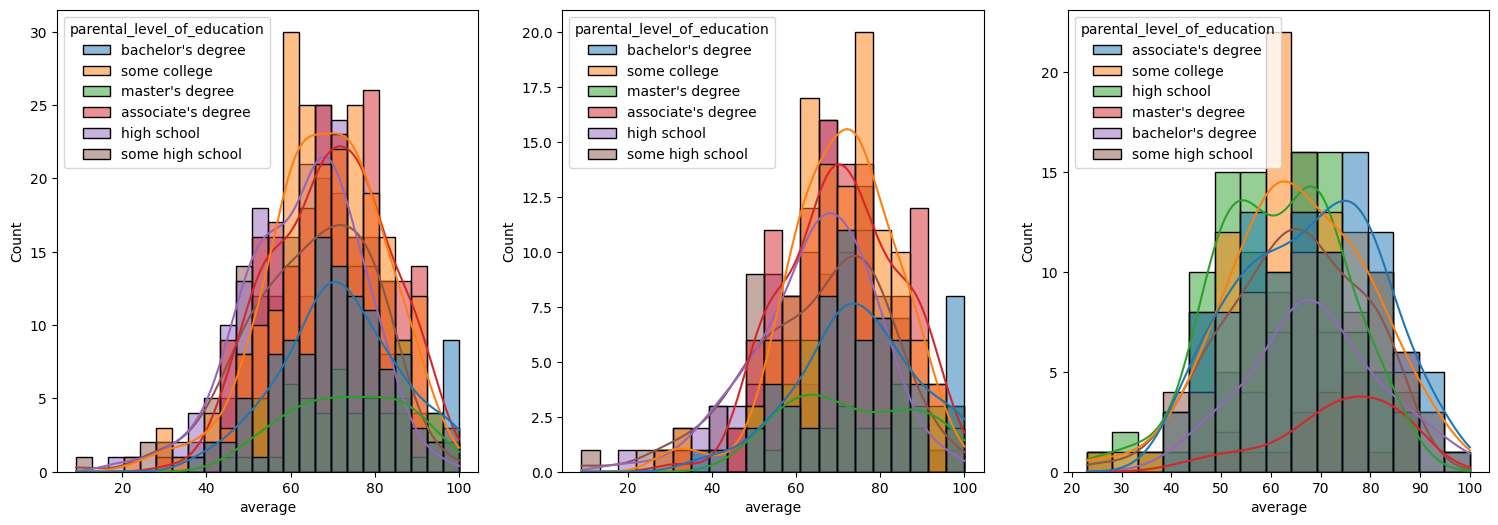

In [26]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
sns.histplot(data= student_df, x= 'average', kde= True, hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=student_df[student_df['gender'] == 'female'], x= 'average', kde=True, hue= 'parental_level_of_education')
plt.subplot(143)
sns.histplot(data= student_df[student_df['gender']== 'male'], x= 'average', kde=True, hue='parental_level_of_education')
plt.show()

##### Insight
###### 1.In general the parents education level doesn't affect student test scores
###### 2. Female student test scores is not affected by the parent education level
###### 3. Male student test scores is lower for the higher educated parents and higher for the lower educated parents

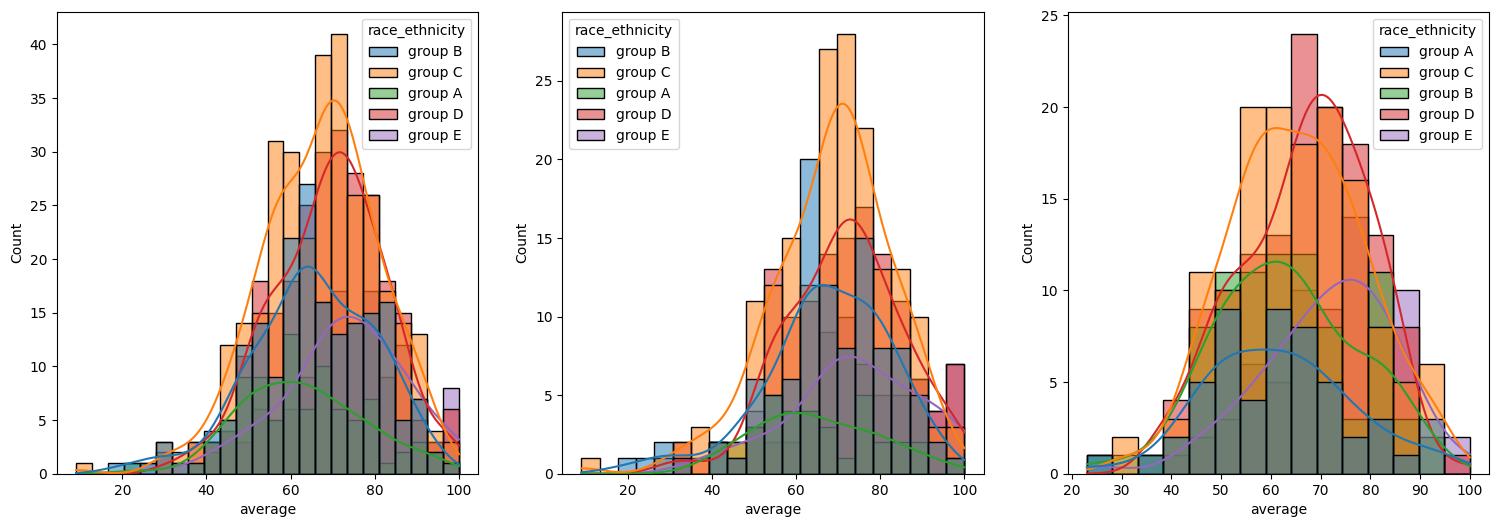

In [27]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
sns.histplot(data= student_df, x= 'average', kde= True, hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=student_df[student_df['gender'] == 'female'], x= 'average', kde=True, hue= 'race_ethnicity')
plt.subplot(143)
sns.histplot(data= student_df[student_df['gender']== 'male'], x= 'average', kde=True, hue='race_ethnicity')
plt.show()

##### Insight
###### 1. Female gender in Group C and Group D perform better in test scores
###### 2. Both gender in Group A and Group B tend to perform worse in test scores

<Axes: title={'center': 'Writing Scores'}, ylabel='writing_score'>

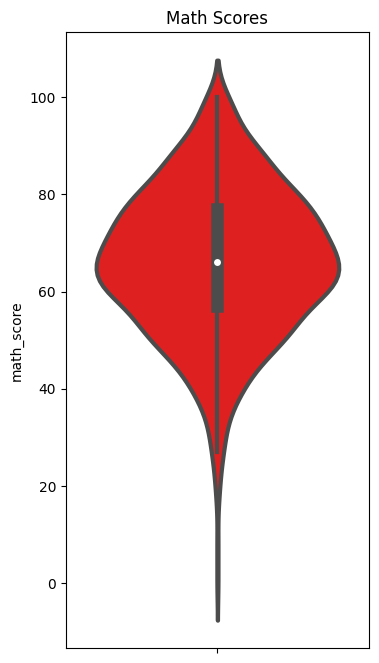

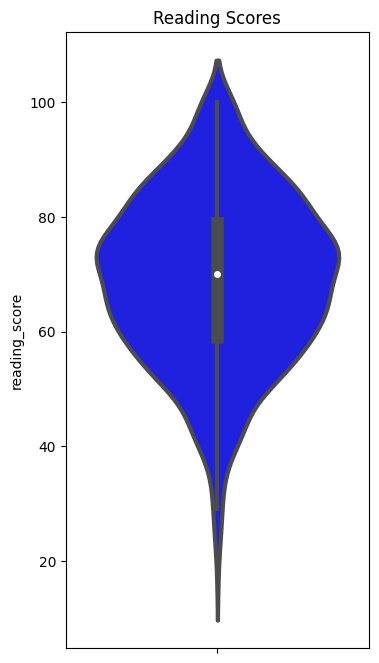

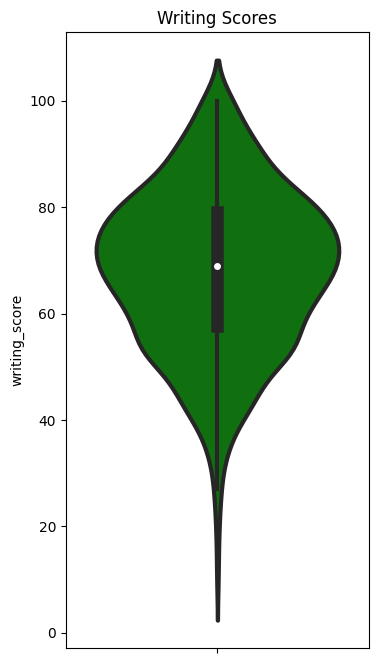

In [28]:
# Maximum test scores
plt.figure(figsize=(18, 8))
plt.subplot(1, 4, 1)
plt.title("Math Scores")
sns.violinplot(y='math_score', data =student_df, color='red', linewidth=3 )

plt.figure(figsize=(18, 8))
plt.subplot(1, 4, 2)
plt.title("Reading Scores")
sns.violinplot(y='reading_score', data =student_df, color='blue', linewidth=3 )

plt.figure(figsize=(18, 8))
plt.subplot(1, 4, 3)
plt.title("Writing Scores")
sns.violinplot(y='writing_score', data =student_df, color='green', linewidth=3 )


##### Insight
###### 1. Students score between 70 and 80 for reading and writing 
###### 2. Students score between 60 and 80 for math

#### Multivariate Analysis usign Pieplot

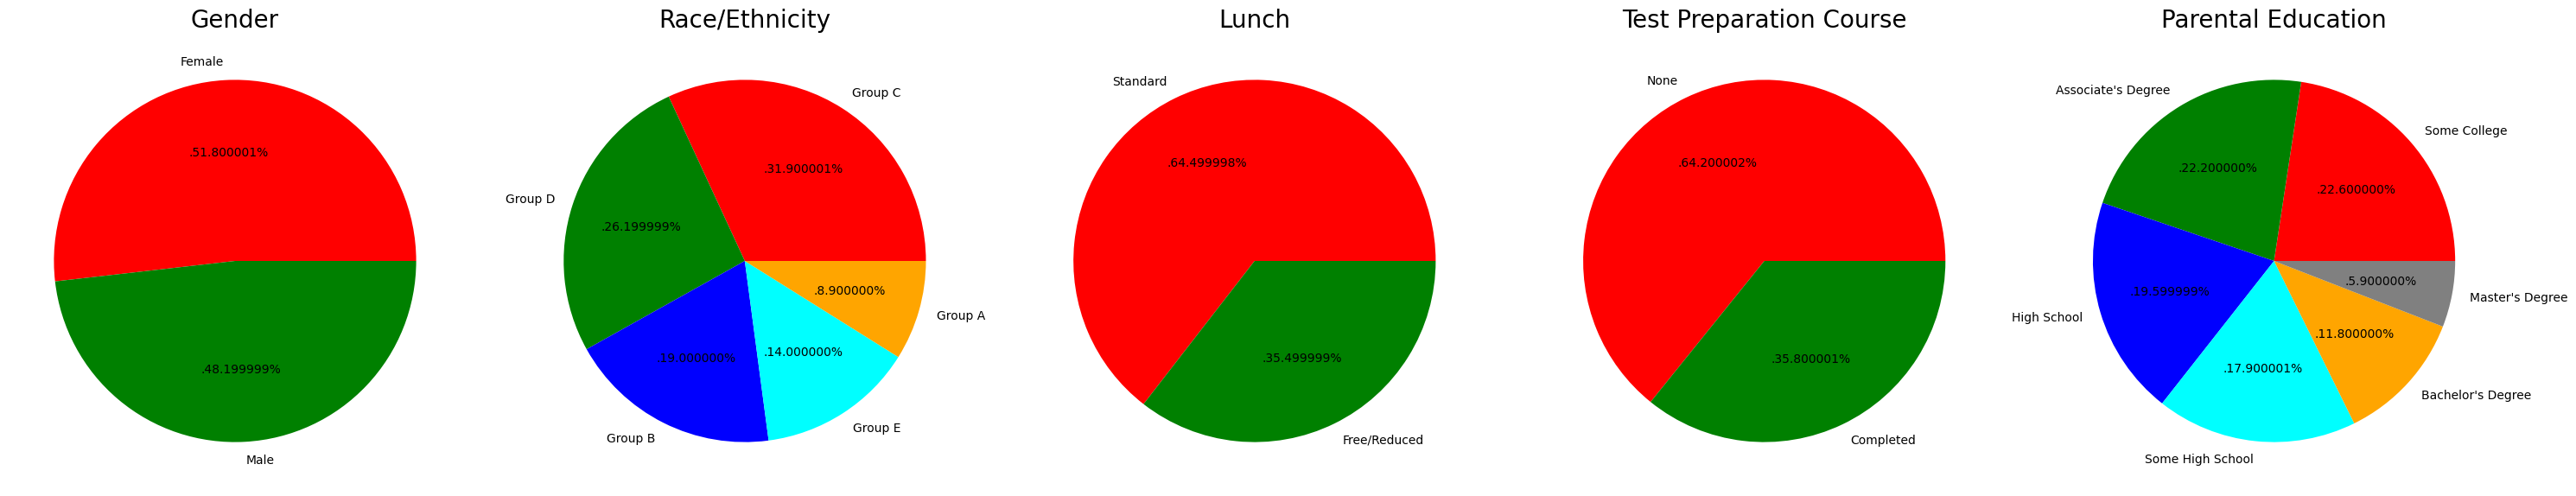

In [7]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1,5,1)
size= student_df['gender'].value_counts()
labels = 'Female' , 'Male'
color = ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct= '.%2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

plt.subplot(1,5,2)
size= student_df['race_ethnicity'].value_counts()
labels = 'Group C' , 'Group D', 'Group B', 'Group E', 'Group A'
color = ['red', 'green','blue', 'cyan','orange']

plt.pie(size, colors=color, labels=labels, autopct= '.%2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(1,5,3)
size= student_df['lunch'].value_counts()
labels = 'Standard', 'Free/Reduced'
color = ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct= '.%2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')

plt.subplot(1,5,4)
size = student_df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red', 'green']

plt.pie(size, colors= color, labels= labels, autopct='.%2f%%')
plt.title('Test Preparation Course', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,5)
size = student_df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors= color, labels= labels, autopct='.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()


##### Insight
###### 1. Number of Students of both genders is almost equal
###### 2. Group C contains largest number of students
###### 3. Higher number of students have Standard lunch
###### 4. Higher number of students have not taken test preparation course
###### 5. Students with parental education level of "Some College" is highest and "Associate's degree" follows

##### Feature Engineering
###### Gender Column
###### What is the distribution between male and female


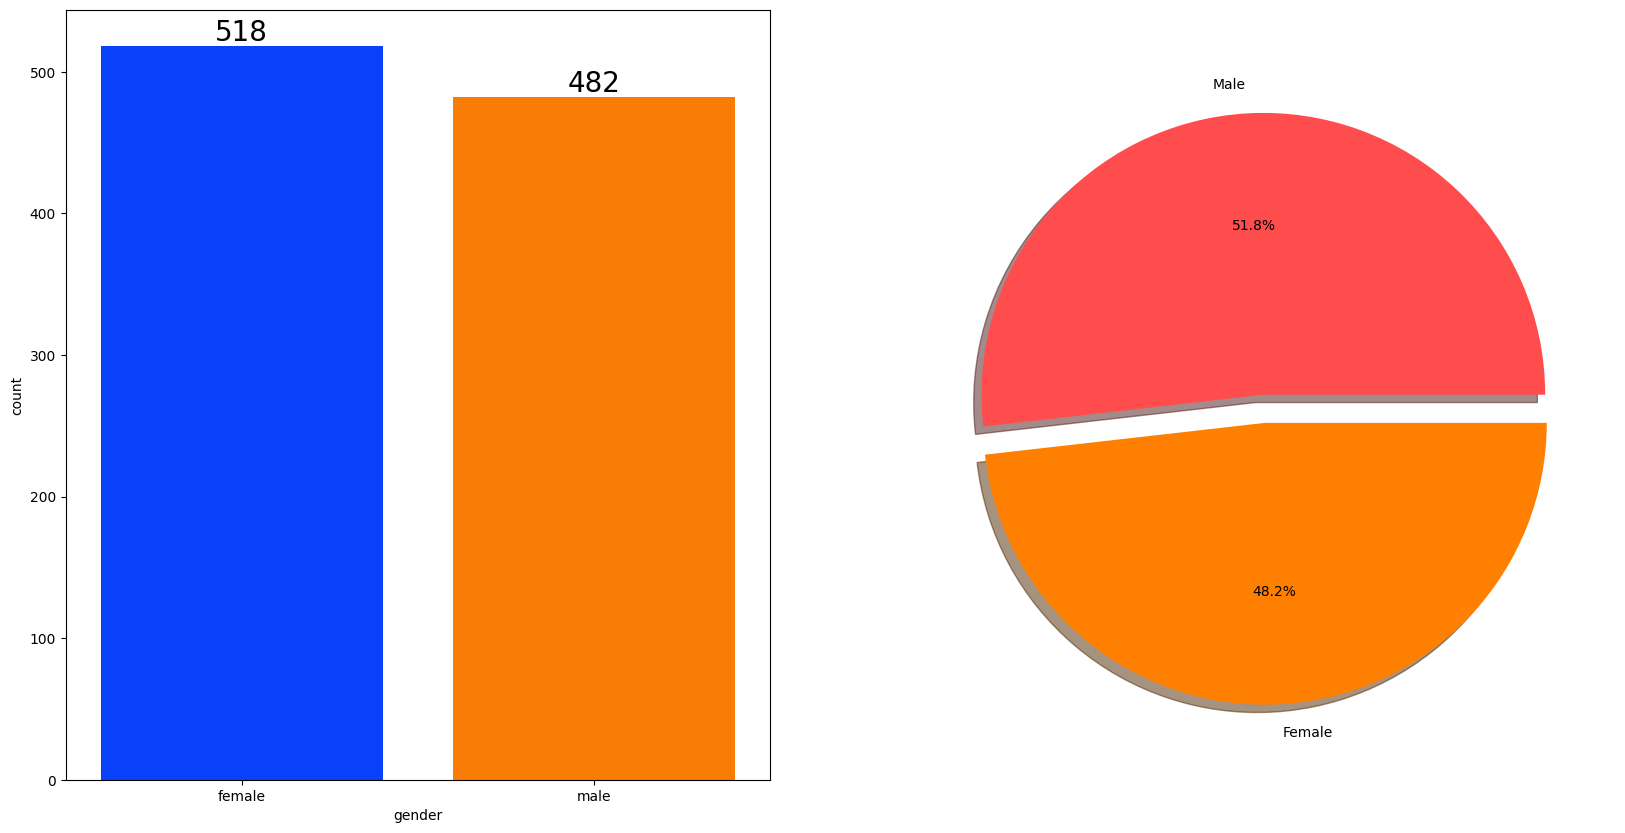

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
sns.countplot(data= student_df, x= student_df['gender'], palette='bright', ax = ax[0], saturation= 0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size= 20)

plt.pie(x=student_df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insight
##### Male students are slightly higher in number

###### Does the gender of students affect test scores

In [49]:
gender_group = student_df.groupby('gender')
gender_group.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
5,female,group B,associate's degree,standard,none,71,83,78,232,77.333333
6,female,group B,some college,standard,completed,88,95,92,275,91.666667
7,male,group B,some college,free/reduced,none,40,43,39,122,40.666667
8,male,group D,high school,free/reduced,completed,64,64,67,195,65.000000
10,male,group C,associate's degree,standard,none,58,54,52,164,54.666667


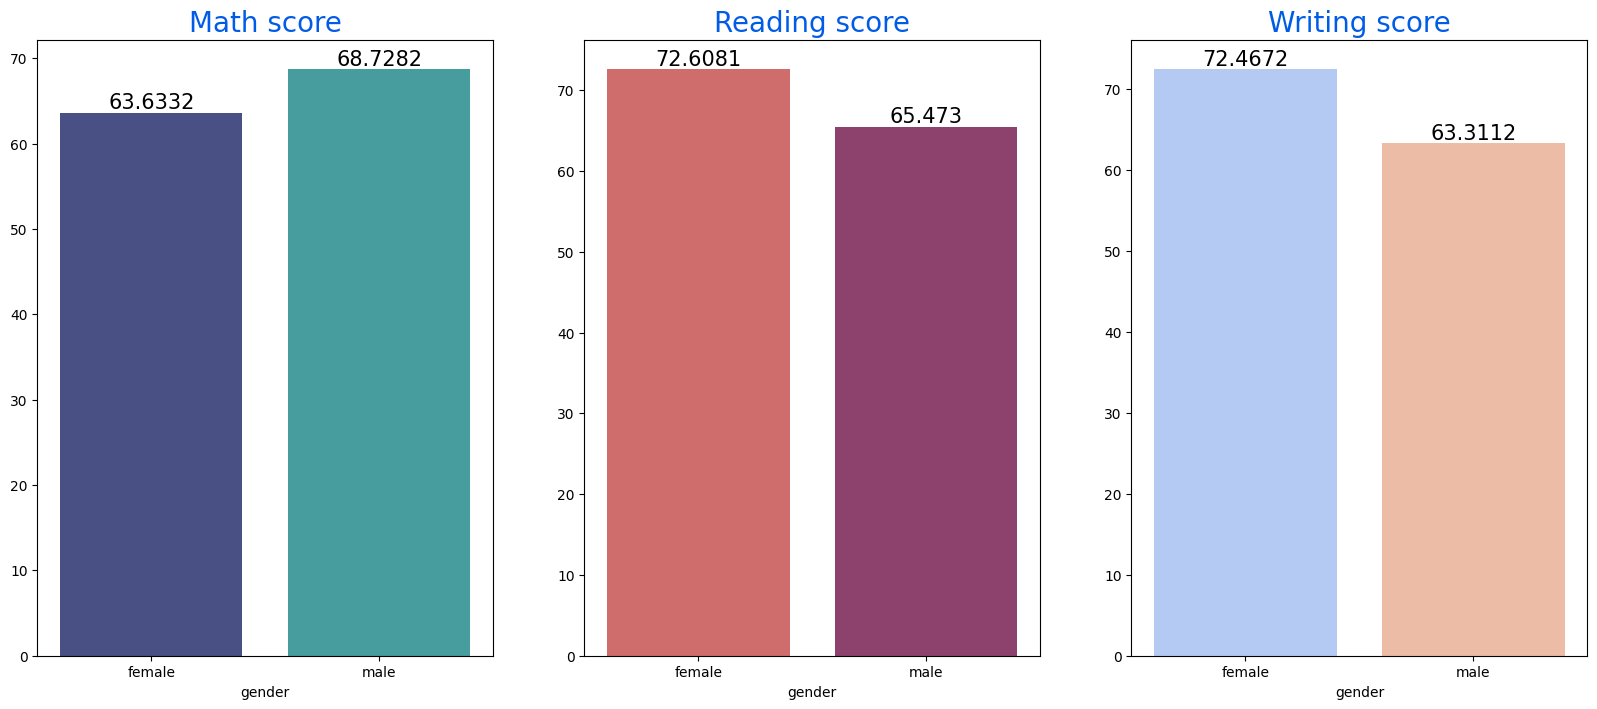

In [51]:
fig,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=gender_group['math_score'].mean().index,y=gender_group['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=gender_group['reading_score'].mean().index,y=gender_group['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=gender_group['writing_score'].mean().index,y=gender_group['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insight
###### Male students on average have higher Maths score than female students 
###### Female students on average have higher Writing and Reading score than male students

##### RACE/EHNICITY COLUMN
###### Race/Ethnicity Group wise distribution

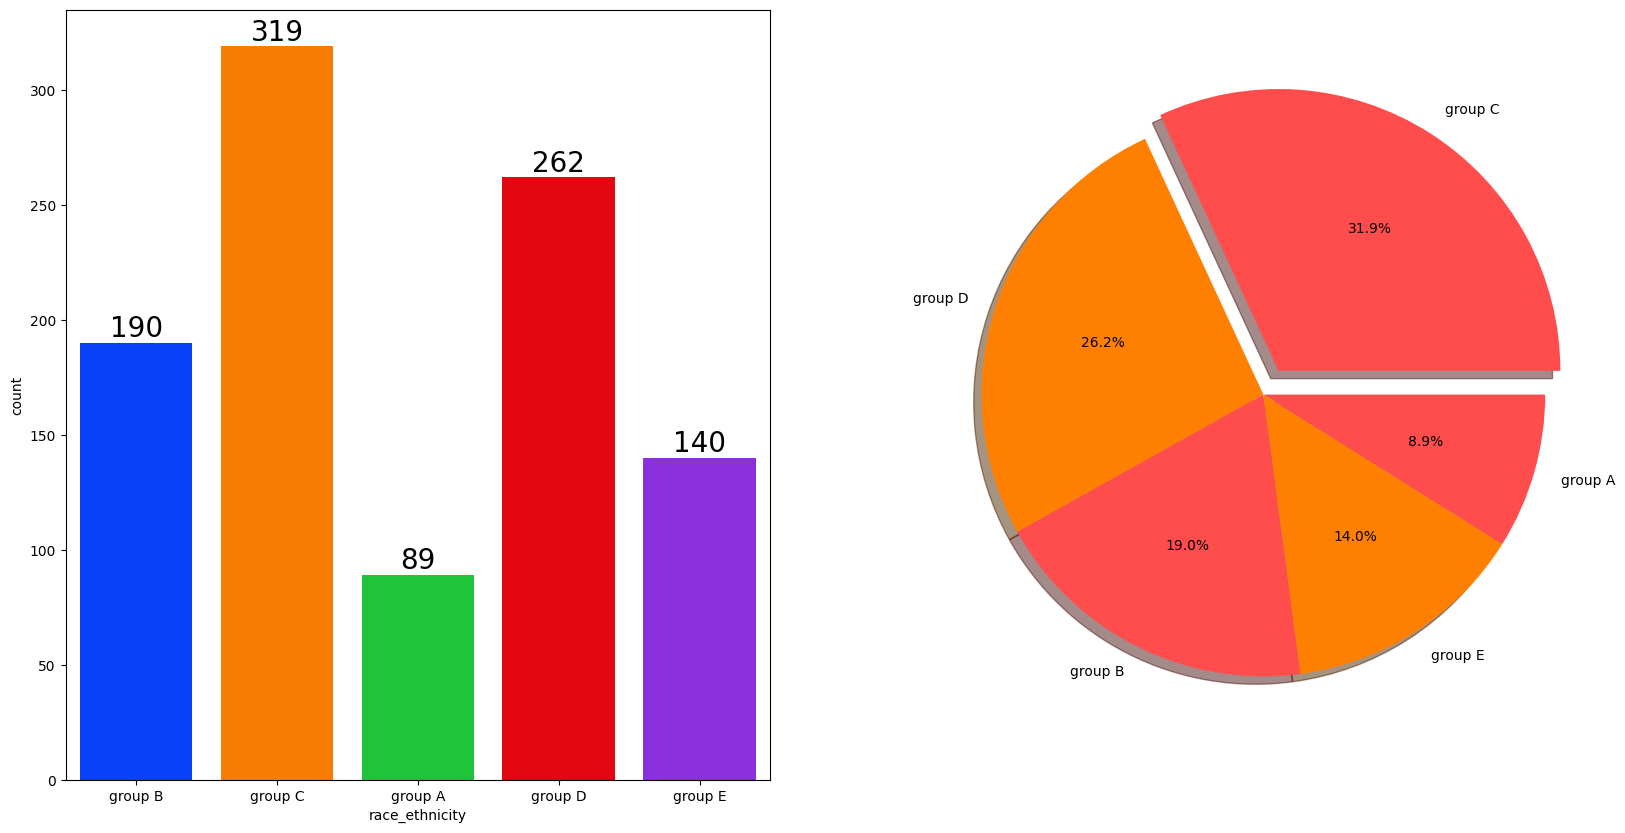

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
sns.countplot(data= student_df, x= student_df['race_ethnicity'], palette='bright', ax = ax[0], saturation= 0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size= 20)

plt.pie(x=student_df['race_ethnicity'].value_counts(),labels=student_df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insight
###### Most of the students come belong to Group C and Group D
###### Students from Group A are the smallest in number 

#### Does Race/Ethnicity affect test scores

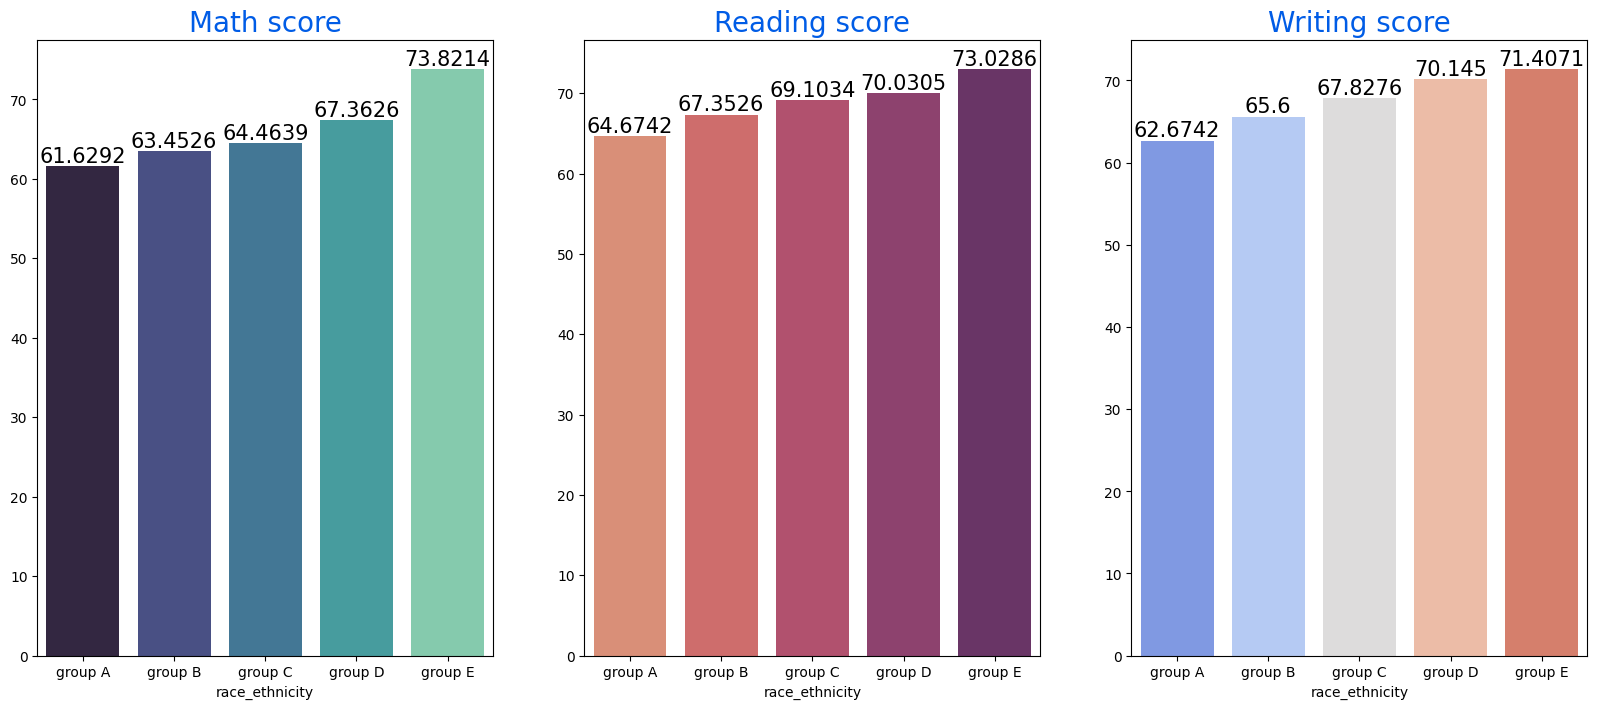

In [54]:
race_group = student_df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=race_group['math_score'].mean().index,y=race_group['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=race_group['reading_score'].mean().index,y=race_group['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=race_group['writing_score'].mean().index,y=race_group['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insight
###### Group E has the highest scores on all test scores
###### Group A has the lowest scores on all test scores

##### Lunch Column
###### Does the type of Lunch students consume affect test scores

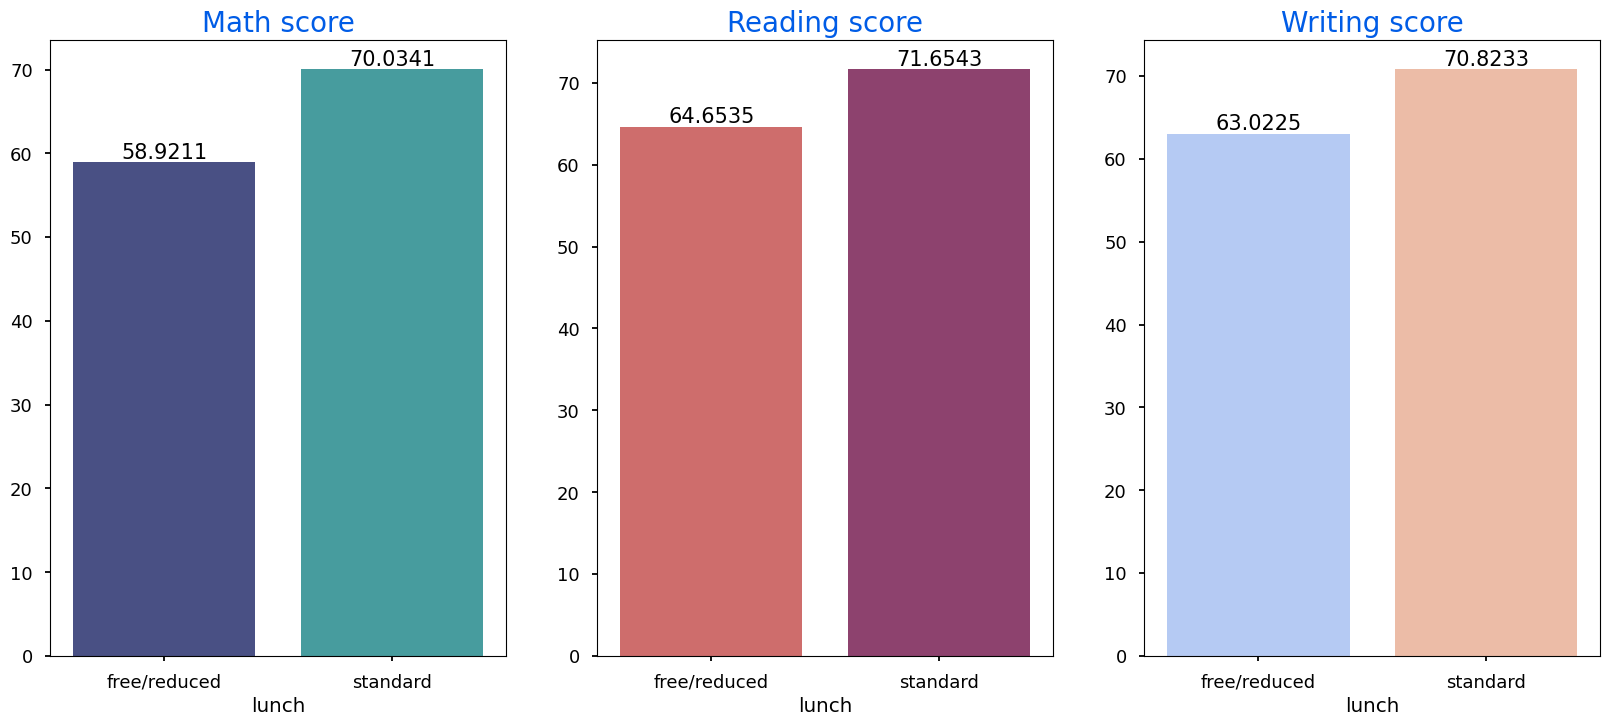

In [6]:
lunch_group = student_df.groupby('lunch')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=lunch_group['math_score'].mean().index,y=lunch_group['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=lunch_group['reading_score'].mean().index,y=lunch_group['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=lunch_group['writing_score'].mean().index,y=lunch_group['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

##### Insight
###### Students perform better on Standard Lunch

#### Test Preparation Course
###### Does Taking Test Preparation Course affect test scores

<Axes: xlabel='lunch', ylabel='writing_score'>

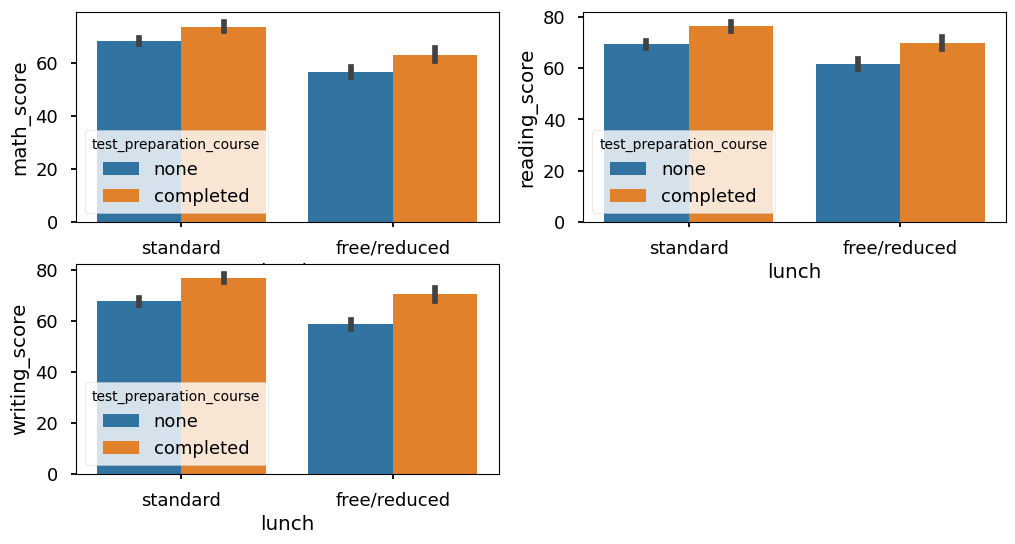

In [9]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=student_df['lunch'], y=student_df['math_score'], hue=student_df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=student_df['lunch'], y=student_df['reading_score'], hue=student_df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=student_df['lunch'], y=student_df['writing_score'], hue=student_df['test_preparation_course'])

#### Insight
###### Completing Test Preparation Course doesn't affect test courses that much

##### Parental College Level
###### Does the parental college level affect test scores

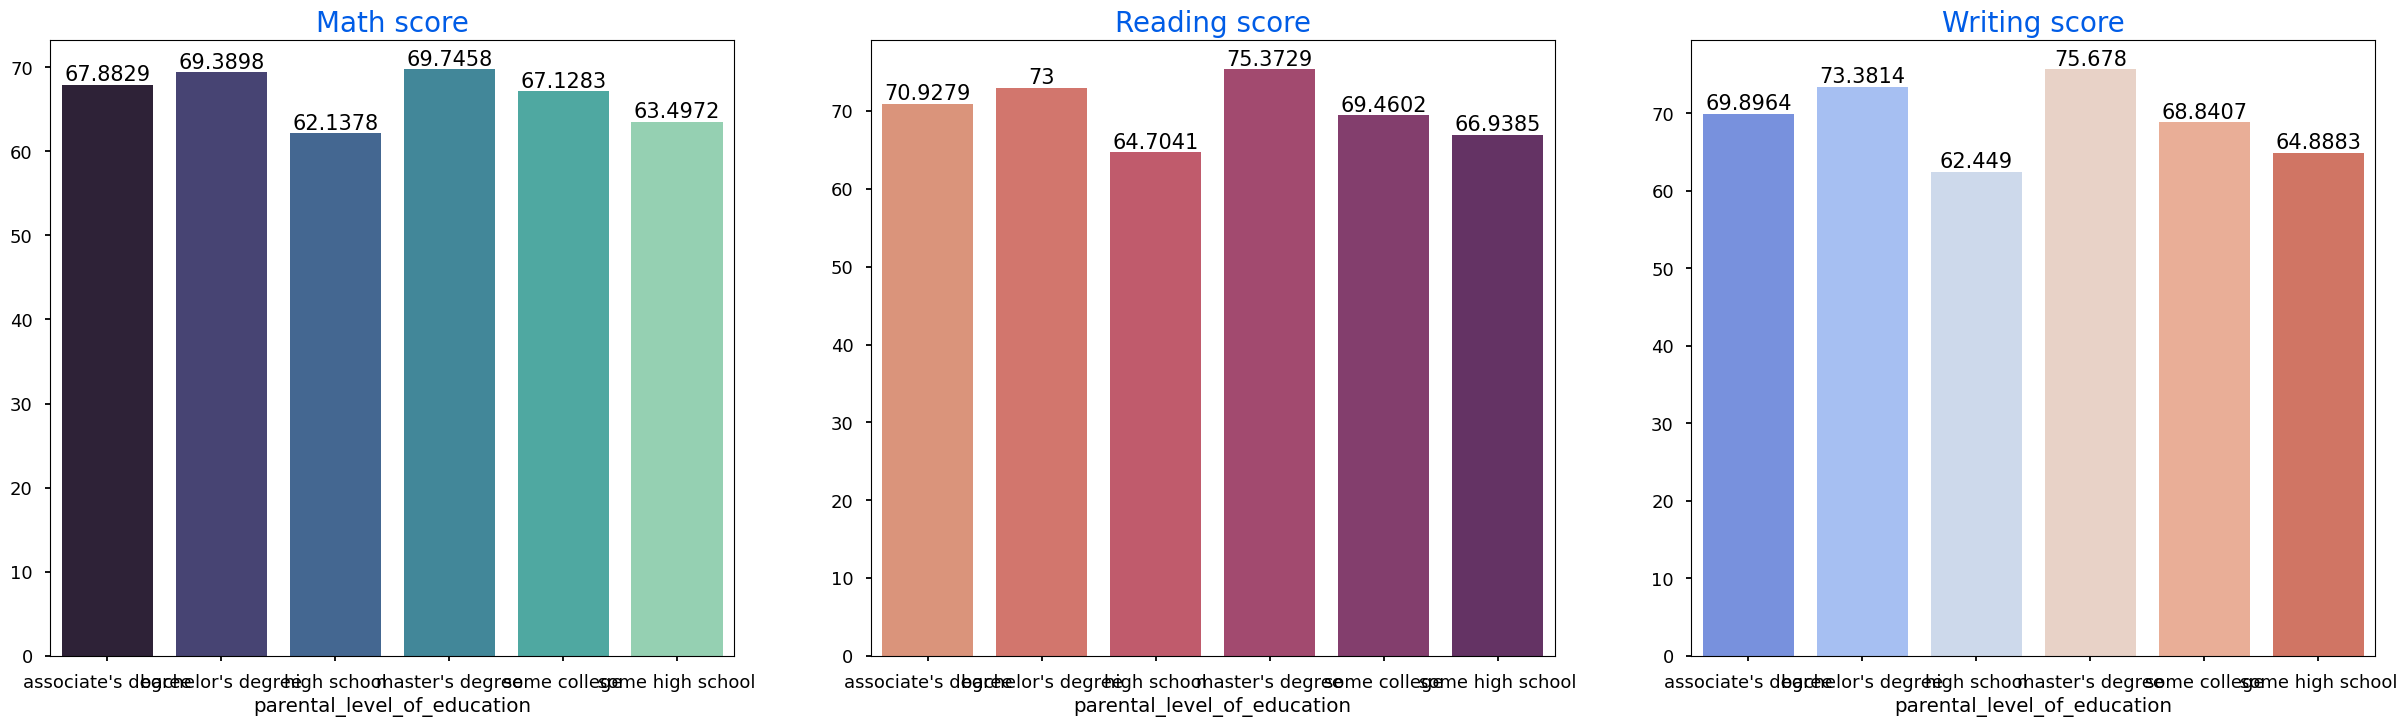

In [15]:
parent_group = student_df.groupby('parental_level_of_education')

f,ax=plt.subplots(1,3,figsize=(30,8))
sns.barplot(x=parent_group['math_score'].mean().index,y=parent_group['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=parent_group['reading_score'].mean().index,y=parent_group['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=parent_group['writing_score'].mean().index,y=parent_group['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

##### Insight
###### Students with Master's and Bachelor's education level score higher on all the tests.

### Conclusion
###### Students scores were affected by Gender, Race/Ethnicity, and Lunch.
###### Female students on average scored higher on all the test scores.
###### Completing Test Preparation course has little effect on student test scores.